## Read Undersampled_data:

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter
import random_forest_method
import performance_measure
import svm_method
import data_sampling
import split_data_set

In [48]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

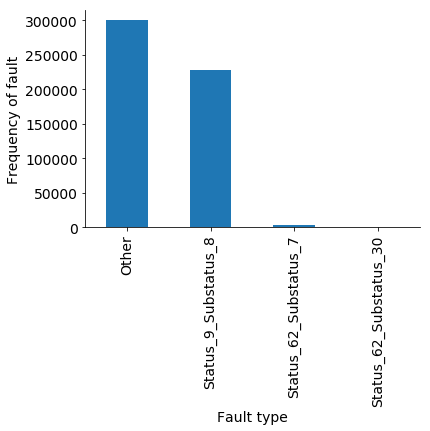

<Figure size 1440x1152 with 0 Axes>

In [49]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [50]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [51]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,50000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,50000,"Status_9_Substatus_8")

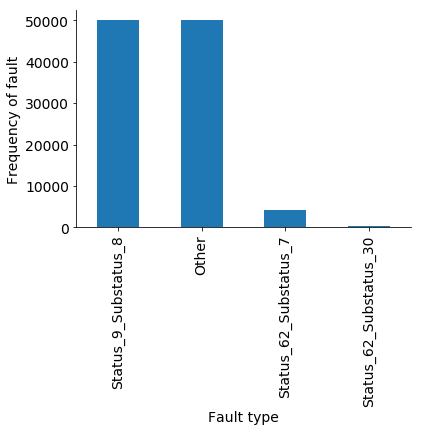

<Figure size 1440x1152 with 0 Axes>

In [52]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [53]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
X.shape

(104481, 34)

In [54]:
y.value_counts()

Status_9_Substatus_8      50000
Other                     50000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

### Split into training and test

In [55]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [56]:
y_train.value_counts()

Other                     33500
Status_9_Substatus_8      33500
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [57]:
y_test.value_counts()

Other                     16500
Status_9_Substatus_8      16500
Status_62_Substatus_7      1352
Status_62_Substatus_30      127
Name: Status, dtype: int64

## Random forest and feature importance

Normalized confusion matrix
[[9.91393939e-01 6.06060606e-05 2.72727273e-03 5.81818182e-03]
 [2.36220472e-01 7.48031496e-01 0.00000000e+00 1.57480315e-02]
 [8.13609467e-03 0.00000000e+00 9.91863905e-01 0.00000000e+00]
 [3.21212121e-03 0.00000000e+00 0.00000000e+00 9.96787879e-01]]


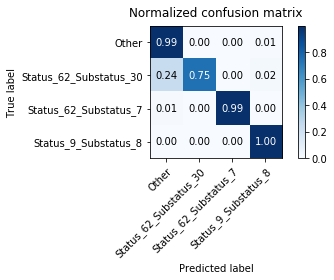

Total Accuracy 		0.993

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.994 		 0.991 		 0.993
Status_62_Substatus_30    	 0.990 		 0.748 		 0.852
Status_62_Substatus_7     	 0.968 		 0.992 		 0.980
Status_9_Substatus_8      	 0.994 		 0.997 		 0.995


In [58]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [59]:
rf

,importance
ActivePower,0.167399
Log-T-Raw-Rectifier1HeatSink,0.093474
Log-T-Raw-TransformerTemperature,0.087176
Log-T-Raw-Stator1Temperature,0.047814
Log-T-Raw-Rectifier2HeatSink,0.041749
Log-T-Raw-Stator2Temperature,0.040087
Log-T-Raw-Rotor2Temperature,0.037835
Log-T-Raw-Rotor1Temperature,0.037730
Log-T-Raw-NacelleAmbientTemperature,0.036038
Average blade angle across A B C,0.032479


# Preprocessing

### Scale dataset

In [62]:
from sklearn import preprocessing

print(X_train.shape)

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)

(70002, 34)
(70002, 34)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=False)
X_train_scaled = scaler.fit(X_train)
X_train_scaled = X_train_scaled.transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=list(X))
X_train.head(10)

X_test_scaled = scaler.fit(X_test)
X_test_scaled = X_test_scaled.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X))
X_test_scaled.head(10)

,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.489368,0.129943,0.401438,0.323120,0.039983,0.581081,0.658824,0.344156,0.597701,0.604651,...,0.569892,0.647059,0.583333,0.404255,0.538462,0.529412,0.431034,0.390476,0.000000,0.482945
1,0.530172,0.257062,0.506345,0.217270,0.000000,0.500000,0.576471,0.311688,0.517241,0.534884,...,0.795699,0.811765,0.466667,0.521277,0.346154,0.435294,0.310345,0.323810,0.184974,0.433444
2,0.471264,0.118644,0.432741,0.415042,0.000000,0.405405,0.458824,0.259740,0.425287,0.430233,...,0.311828,0.329412,0.316667,0.074468,0.211538,0.329412,0.448276,0.142857,0.000000,0.538478
3,0.518678,0.245763,0.826142,0.415042,0.393170,0.824324,0.905882,0.428571,0.712644,0.744186,...,0.709677,0.741176,0.650000,0.521277,0.711538,0.764706,0.724138,0.504762,0.125795,0.572795
4,0.491954,0.305085,0.815144,0.423398,0.566431,0.675676,0.741176,0.370130,0.517241,0.523256,...,0.559140,0.658824,0.466667,0.500000,0.346154,0.552941,0.431034,0.400000,0.000000,0.559692
5,0.514368,0.245763,0.799915,0.571031,0.426072,0.716216,0.764706,0.344156,0.563218,0.581395,...,0.666667,0.741176,0.500000,0.531915,0.557692,0.705882,0.620690,0.542857,0.000000,0.686148
6,0.494828,0.149718,0.495347,0.899721,0.000000,0.608108,0.682353,0.344156,0.620690,0.616279,...,0.806452,0.811765,0.616667,0.478723,0.615385,0.541176,0.431034,0.276190,0.011426,0.917429
7,0.536207,0.090395,0.327834,0.573816,0.012911,0.689189,0.705882,0.376623,0.643678,0.662791,...,0.645161,0.658824,0.650000,0.351064,0.538462,0.517647,0.413793,0.400000,0.000000,0.704035
8,0.504310,0.384181,0.588833,0.576602,0.155352,0.500000,0.611765,0.324675,0.586207,0.604651,...,0.677419,0.682353,0.483333,0.510638,0.423077,0.517647,0.362069,0.323810,0.306996,0.683028
9,0.554023,0.104520,0.376904,0.997214,0.031653,0.621622,0.623529,0.344156,0.620690,0.627907,...,0.612903,0.658824,0.650000,0.361702,0.653846,0.600000,0.568966,0.400000,0.000000,0.284318


### SVM method

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.90909091 0.         0.         0.09090909]
 [0.8976378  0.         0.         0.1023622 ]
 [0.94822485 0.         0.         0.05177515]
 [0.34581818 0.         0.         0.65418182]]


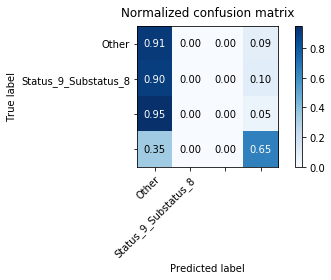

Plotting Performance Measure...
Total Accuracy 		0.748

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.679 		 0.909 		 0.777
Status_9_Substatus_8      	 0.872 		 0.654 		 0.748


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [63]:
svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique):

In [ ]:
sm = SMOTE(random_state=12)
X_